## Compare variant calls: WGALN[bwamem/bcftools] vs Cortex

In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [3]:
wgaln_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'

In [4]:
!ls -lh {wgaln_dir}/bwamem/*

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_7g8:
total 16M
-rw-rw-r-- 1 aliman aliman 677 Apr  8 16:48 3d7_7g8.log
-rw-rw-r-- 1 aliman aliman 16M Apr  8 16:48 3d7_7g8.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_dd2:
total 33M
-rw-rw-r-- 1 aliman aliman 679 Apr  8 16:51 3d7_dd2.log
-rw-rw-r-- 1 aliman aliman 33M Apr  8 16:51 3d7_dd2.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3:
total 48M
-rw-rw-r-- 1 aliman aliman  11M Apr 10 10:55 3d7_hb3.bam
-rw-rw-r-- 1 aliman aliman  15K Apr 10 10:55 3d7_hb3.bam.bai
-rw-rw-r-- 1 aliman aliman   96 Apr 10 10:56 3d7_hb3.bam.samples
-rw-rw-r-- 1 aliman aliman 776K Apr 10 11:00 3d7_hb3.bcftools_m.vcf.gz
-rw-rw-r-- 1 aliman aliman  11K Apr 10 11:00 3d7_hb3.bcftools_m.vcf.gz.tbi
-rw-rw-r-- 1 aliman aliman 673K Apr 10 11:00 3d7_hb3.laat.vcf.gz
-rw-rw-r-- 1 aliman aliman  11K Apr 10 11:00 3d7_hb3.laat.vcf.gz.tbi
drwxrwxr-x 2 aliman aliman 4.0K 

In [5]:
fasta_fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'
genome = pyfasta.Fasta(fasta_fn)

In [6]:
method = 'bwamem'
alignment = '3d7_hb3'
sam_fn = os.path.join(wgaln_dir, method, alignment, '%s.sam' % alignment)
!ls -lh {sam_fn}
bam_fn = sam_fn[:-3] + 'bam'
!ls -lh {bam_fn}
laat_vcf_fn = bam_fn[:-3] + 'laat.vcf.gz'
!ls -lh {laat_vcf_fn}

-rw-rw-r-- 1 aliman aliman 36M Apr  8 16:52 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.sam
-rw-rw-r-- 1 aliman aliman 11M Apr 10 10:55 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bam
-rw-rw-r-- 1 aliman aliman 673K Apr 10 11:00 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.laat.vcf.gz


In [7]:
variants_wgaln = vcfnp.variants(laat_vcf_fn, 
                                fields=['CHROM', 'POS', 'REF', 'ALT'],
                                arities={'ALT': 1},
                                cache=True)
variants_wgaln

[vcfnp] 2015-04-10 11:18:54.924865 :: caching is enabled
[vcfnp] 2015-04-10 11:18:54.925296 :: cache file available
[vcfnp] 2015-04-10 11:18:54.925542 :: loading from cache file /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.laat.vcf.gz.vcfnp_cache/variants.npy


array([(b'Pf3D7_01_v3', 16471, b'T', b'A'),
       (b'Pf3D7_01_v3', 16648, b'C', b'T'),
       (b'Pf3D7_01_v3', 16651, b'G', b'A'), ...,
       (b'Pf3D7_14_v3', 3261240, b'A', b'C'),
       (b'Pf3D7_14_v3', 3261269, b'A', b'G'),
       (b'Pf3D7_14_v3', 3261373, b'A', b'C')], 
      dtype=[('CHROM', 'S12'), ('POS', '<i4'), ('REF', 'S12'), ('ALT', 'S12')])

In [8]:
callset_ngs = np.load('/data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.cortex.final.npz')
callset_ngs.keys()

['calldata', 'variants']

In [9]:
filter_pass_ngs = callset_ngs['variants']['FILTER_PASS']

In [10]:
callset_ngs['calldata'].dtype.names

('3D7/PG0051-C/ERR019061',
 'HB3/PG0052-C/ERR019054',
 'C01/PG0062-C/ERR019070',
 'C01/PG0065-C/ERR019064',
 'C02/PG0053-C/ERR019067',
 'C02/PG0055-C/ERR019066',
 'C02/PG0056-C/ERR019068',
 'C02/PG0067-C/ERR019073',
 'C03/PG0066-C/ERR019072',
 'C04/PG0061-C/ERR019059',
 'C05/PG0068-C/ERR019065',
 'C06/PG0069-C/ERR019055',
 'C07/PG0070-C/ERR019056',
 'C08/PG0071-C/ERR019074',
 'C09/PG0072-C/ERR019057',
 'C10/PG0063-C/ERR019060',
 'C11/PG0064-C/ERR019071',
 'C12/PG0058-C/ERR019063',
 'C13/PG0054-C/ERR019062',
 'C14/PG0060-C/ERR019058',
 'C15/PG0057-C/ERR019069')

In [11]:
genotype_ngs = vcfnp.view2d(callset_ngs['calldata'])['genotype']
genotype_ngs.shape

(56872, 21)

In [12]:
clone_is_alt_ngs = genotype_ngs[:, 1] == 1

In [13]:
nnz(filter_pass_ngs)

27296

In [14]:
nnz(clone_is_alt_ngs)

49797

In [15]:
nnz(filter_pass_ngs & clone_is_alt_ngs)

27278

In [16]:
# obtain variants
variants_ngs = callset_ngs['variants'][filter_pass_ngs & clone_is_alt_ngs]

In [17]:
tbl_regions_1b

0|region_chrom,1|region_start,2|region_stop,3|region_type,4|region_size
Pf3D7_01_v3,1,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27337,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92901,457931,Core,365031
Pf3D7_01_v3,457932,460311,Centromere,2380
Pf3D7_01_v3,460312,575900,Core,115589


In [18]:
def tabulate_variants_ngs(chrom):
    tbl = (etl
        .fromarray(variants_ngs[variants_ngs['CHROM'] == chrom])
        .cut('CHROM', 'POS', 'REF', 'ALT')
        .convert(['CHROM', 'REF'], lambda v: str(v, 'ascii'))
        .convert('ALT', lambda v: str(v[0], 'ascii'))
        .addfield('svlen', lambda row: len(row.ALT) - len(row.REF))
        .addfield('vtype', lambda row: 'SNP' if row.svlen == 0 else 'DEL' if row.svlen < 0 else 'INS')
    )
    return tbl

In [19]:
tbl_variants_ngs = tabulate_variants_ngs(b'Pf3D7_01_v3')
tbl_variants_ngs.display(5)
tbl_variants_ngs.nrows()

0|CHROM,1|POS,2|REF,3|ALT,4|svlen,5|vtype
Pf3D7_01_v3,94590,T,TATAC,4,INS
Pf3D7_01_v3,94993,CATATAT,C,-6,DEL
Pf3D7_01_v3,95518,G,T,0,SNP
Pf3D7_01_v3,95621,T,A,0,SNP
Pf3D7_01_v3,95632,G,A,0,SNP


756

In [20]:
def tabulate_variants_wgaln(chrom):
    tbl = (etl
        .fromarray(variants_wgaln[variants_wgaln['CHROM'] == chrom])
        .convert(['CHROM', 'REF', 'ALT'], lambda v: str(v, 'ascii'))
        .intervalleftjoin(tbl_regions_1b, 
                          lkey='CHROM', rkey='region_chrom', 
                          lstart='POS', lstop='POS', 
                          rstart='region_start', rstop='region_stop',
                          include_stop=True)
        .eq('region_type', 'Core')
        .cutout(4, 5, 6, 7, 8)
        .addfield('svlen', lambda row: len(row.ALT) - len(row.REF))
        .addfield('vtype', lambda row: 'SNP' if row.svlen == 0 else 'DEL' if row.svlen < 0 else 'INS')
    )
    return tbl

In [21]:
tbl_variants_wgaln = tabulate_variants_wgaln(b'Pf3D7_01_v3')
tbl_variants_wgaln.display(5)
tbl_variants_wgaln.nrows()

0|CHROM,1|POS,2|REF,3|ALT,4|svlen,5|vtype
Pf3D7_01_v3,93901,AATATATATAT,A,-10,DEL
Pf3D7_01_v3,94590,T,TATAC,4,INS
Pf3D7_01_v3,94993,CATATAT,C,-6,DEL
Pf3D7_01_v3,95518,G,T,0,SNP
Pf3D7_01_v3,95621,T,A,0,SNP


2211

In [22]:
def common_prefix(a, b):
    if len(a) == len(b):
        return a == b
    elif len(a) > len(b):
        return a.startswith(b)
    else:
        return b.startswith(a)
    

def tabulate_variants_joined(chrom):
    cov_wgaln = pysamstats.load_coverage(bam_fn, chrom=str(chrom, 'ascii'), pad=True)
    tbl_variants_ngs = tabulate_variants_ngs(chrom)
    tbl_variants_wgaln = tabulate_variants_wgaln(chrom)
    tbl = (tbl_variants_ngs
        .outerjoin(tbl_variants_wgaln, key=('CHROM', 'POS'), lprefix='ngs_', rprefix='wgaln_')
        .rename({0: 'CHROM', 1: 'POS'})
        .addfield('false_positive_site', lambda row: (row.ngs_REF is not None) and (row.wgaln_REF is None))
        .addfield('false_negative_site', lambda row: (row.ngs_REF is None) and (row.wgaln_REF is not None))
        .addfield('true_positive_site', lambda row: (row.ngs_REF is not None) and (row.wgaln_REF is not None)) 
        .addfield('type_match', lambda row: ((row.ngs_vtype is not None) and (row.ngs_vtype == row.wgaln_vtype)))
        .addfield('allele_match', lambda row: (row.ngs_REF == row.wgaln_REF) and (row.ngs_ALT == row.wgaln_ALT)) 
        .addfield('prefix_match', lambda row: (row.type_match and common_prefix(row.ngs_ALT, row.wgaln_ALT) and common_prefix(row.ngs_REF, row.wgaln_REF)))
        .addfield('coverage_wgaln', lambda row: cov_wgaln.reads_all[row.POS - 1])
        .gt('coverage_wgaln', 0)
    )
    return tbl

In [23]:
tbl_variants_joined = tabulate_variants_joined(b'Pf3D7_01_v3')
def _tr_style(row):
    style = 'background-color: %s' % ('#0f0' if row.allele_match 
                                      else '#af0' if row.type_match
                                      else '#ff0' if row.true_positive_site
                                      else '#f44' if row.false_positive_site
                                      else '#44f' if row.false_negative_site
                                      else 'white')
    return style
tbl_variants_joined.display(100, tr_style=_tr_style)


0|CHROM,1|POS,2|ngs_REF,3|ngs_ALT,4|ngs_svlen,5|ngs_vtype,6|wgaln_REF,7|wgaln_ALT,8|wgaln_svlen,9|wgaln_vtype,10|false_positive_site,11|false_negative_site,12|true_positive_site,13|type_match,14|allele_match,15|prefix_match,16|coverage_wgaln
Pf3D7_01_v3,93901,None,None,None,None,AATATATATAT,A,-10,DEL,False,True,False,False,False,False,1
Pf3D7_01_v3,94590,T,TATAC,4,INS,T,TATAC,4,INS,False,False,True,True,True,True,1
Pf3D7_01_v3,94993,CATATAT,C,-6,DEL,CATATAT,C,-6,DEL,False,False,True,True,True,True,1
Pf3D7_01_v3,95518,G,T,0,SNP,G,T,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95621,T,A,0,SNP,T,A,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95632,G,A,0,SNP,G,A,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95641,G,A,0,SNP,G,A,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95680,A,G,0,SNP,A,G,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95685,G,T,0,SNP,G,T,0,SNP,False,False,True,True,True,True,1
Pf3D7_01_v3,95686,A,C,0,SNP,A,C,0,SNP,False,False,True,True,True,True,1


In [24]:
def plot_variant_density(variants, chrom, window=5000, ax=None):
    v = variants[variants['CHROM'] == chrom]
    seq = np.asarray(genome[str(chrom, 'ascii')])
    counts, windows = allel.stats.windowed_count(v['POS'], size=window, start=1, stop=seq.size)
    y = counts / window
    x = windows.mean(axis=1)
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 1))
        sns.despine(ax=ax, offset=5)
    ax.plot(x, y)
    ax.set_xlim(0, seq.size)

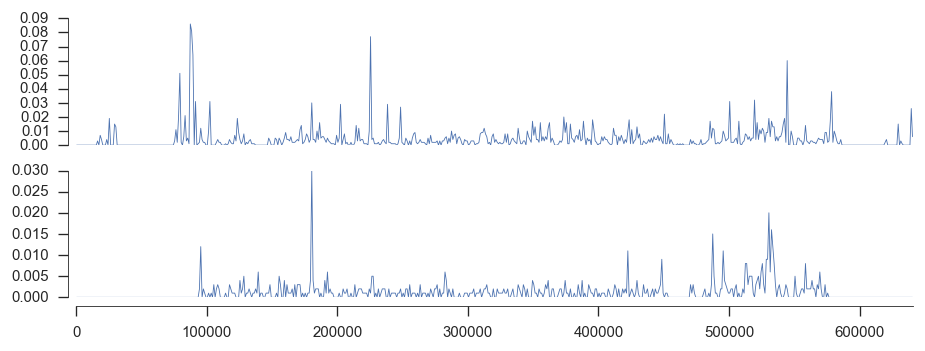

In [26]:
chrom = b'Pf3D7_01_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

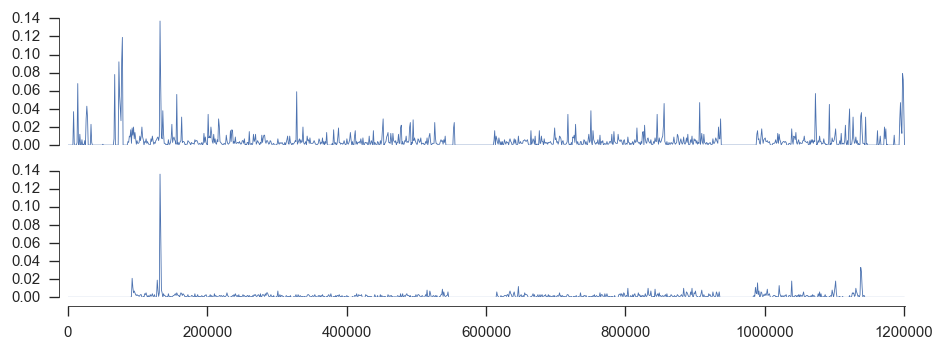

In [27]:
chrom = b'Pf3D7_04_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

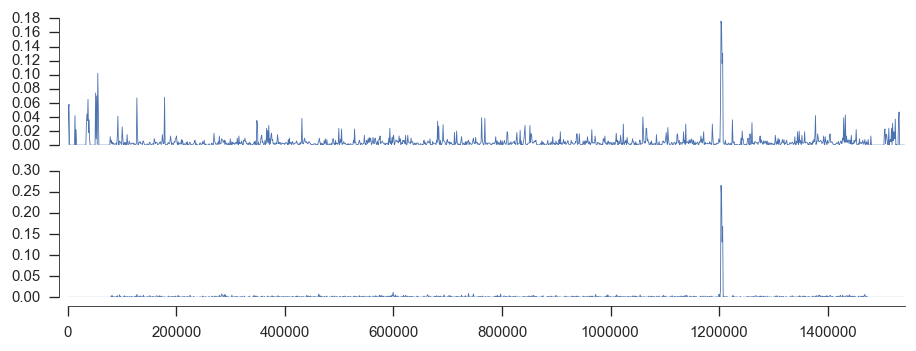

In [28]:
chrom = b'Pf3D7_09_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

In [29]:
def eval_performance(chrom, window=1000):
    tbl_variants_joined = tabulate_variants_joined(chrom)
    df = tbl_variants_joined.cut('POS', 'ngs_vtype', 'wgaln_vtype', 'false_positive_site', 'false_negative_site', 'true_positive_site', 'type_match', 'allele_match', 'prefix_match').todataframe()
    is_snp = (df.ngs_vtype == 'SNP')
    is_indel = (df.ngs_vtype == 'INS') | (df.ngs_vtype == 'DEL')
    pos = df.POS
    seq = np.asarray(genome[str(chrom, 'ascii')])

    # plot site FDR
    pos_site_fp = pos[df.false_positive_site]
    pos_site_tp = pos[df.true_positive_site]
    counts_fp, windows = allel.stats.windowed_count(pos_site_fp, size=window, start=1, stop=seq.size)
    counts_tp, _ = allel.stats.windowed_count(pos_site_tp, size=window, start=1, stop=seq.size)
    windowed_fdr = counts_fp / (counts_fp + counts_tp)    
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=5)
    x = windows.mean(axis=1)
    y = windowed_fdr
    ax.plot(x, y, lw=1)
    ax.set_xlim(1, seq.size)
    ax.set_ylabel('FDR')
    ax.set_title('site FDR')
    ax.set_xlabel(str(chrom, 'ascii'))
    
    # plot site sensitivity
    pos_site_fn = pos[df.false_negative_site]
    counts_fn, _ = allel.stats.windowed_count(pos_site_fn, size=window, start=1, stop=seq.size)
    windowed_sensitivity = counts_tp / (counts_tp + counts_fn)
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=5)
    x = windows.mean(axis=1)
    y = windowed_sensitivity
    ax.plot(x, y, lw=1)
    ax.set_xlim(1, seq.size)
    ax.set_ylabel('sensitivity')
    ax.set_title('site sensitivity')
    ax.set_xlabel(str(chrom, 'ascii'))
    
    # site FDR, defined as #sites only discovered by NGS / total #sites discovered by NGS
    n_site_fp = nnz(df.false_positive_site)
    n_site_tp = nnz(df.true_positive_site)
    fdr_site = n_site_fp / (n_site_fp + n_site_tp)
    print('site FDR', fdr_site)
    
    # site sensitivity, defined as #sites discovered by both NGS and wgaln / total #sites discovered by wgaln
    n_site_fn = nnz(df.false_negative_site)
    sensitivity_site = n_site_tp / (n_site_tp + n_site_fn)
    print('site sensitivity', sensitivity_site)

    # SNP FDR, defined as #SNPs only discovered by NGS / total #SNPs discovered by NGS
    n_snp_fp = nnz(is_snp & ~df.allele_match)
    n_snp_tp = nnz(is_snp & df.allele_match)
    fdr_snp = n_snp_fp / (n_snp_fp + n_snp_tp)
    print('SNP FDR', fdr_snp)
    
    # SNP sensitivity, defined as #SNPs discovered by both NGS and wgaln / total #SNPs discovered by wgaln
    n_snp_fn = nnz((df.wgaln_vtype == 'SNP') & ~df.allele_match)
    log('SNP FP', n_snp_fp, 'TP', n_snp_tp, 'FN', n_snp_fn)
    sensitivity_snp = n_snp_tp / (n_snp_tp + n_snp_fn)
    print('SNP sensitivity', sensitivity_snp)

    # INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(is_indel & ~df.prefix_match)
    n_indel_tp = nnz(is_indel & df.prefix_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('INDEL FDR (prefix match)', fdr_indel)

    # INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_fn = nnz(is_indel_wgaln & ~df.prefix_match)
    log('INDEL FP', n_indel_fp, 'TP', n_indel_tp, 'FN', n_indel_fn)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('INDEL sensitivity (prefix match)', sensitivity_indel)

    # INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(is_indel & ~df.allele_match)
    n_indel_tp = nnz(is_indel & df.allele_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('INDEL FDR (allele match)', fdr_indel)

    # INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_fn = nnz(is_indel_wgaln & ~df.allele_match)
    log('INDEL FP', n_indel_fp, 'TP', n_indel_tp, 'FN', n_indel_fn)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('INDEL sensitivity (allele match)', sensitivity_indel)


2015-04-10 11:23:03.826832 :: SNP FP 32 TP 340 FN 1180
2015-04-10 11:23:03.830337 :: INDEL FP 85 TP 265 FN 426
2015-04-10 11:23:03.833820 :: INDEL FP 145 TP 205 FN 486


site FDR 0.14127423822714683
site sensitivity 0.2804161013116237
SNP FDR 0.08602150537634409
SNP sensitivity 0.2236842105263158
INDEL FDR (prefix match) 0.24285714285714285
INDEL sensitivity (prefix match) 0.3835021707670043
INDEL FDR (allele match) 0.4142857142857143
INDEL sensitivity (allele match) 0.29667149059334297


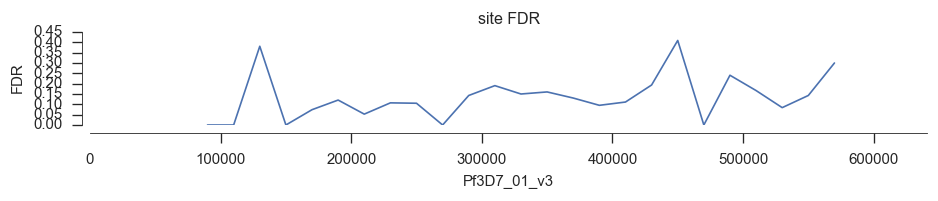

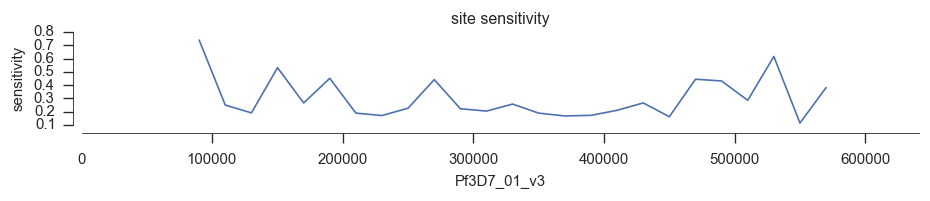

In [30]:
eval_performance(b'Pf3D7_01_v3', window=20000)

2015-04-10 11:23:13.073649 :: SNP FP 64 TP 1498 FN 6736
2015-04-10 11:23:13.078576 :: INDEL FP 349 TP 1688 FN 2531
2015-04-10 11:23:13.083322 :: INDEL FP 642 TP 1395 FN 2824


site FDR 0.10113920533481523
site sensitivity 0.25977676061993094
SNP FDR 0.040973111395646605
SNP sensitivity 0.1819285887782366
INDEL FDR (prefix match) 0.1713303878252332
INDEL sensitivity (prefix match) 0.40009480919649204
INDEL FDR (allele match) 0.31516936671575846
INDEL sensitivity (allele match) 0.3306470727660583


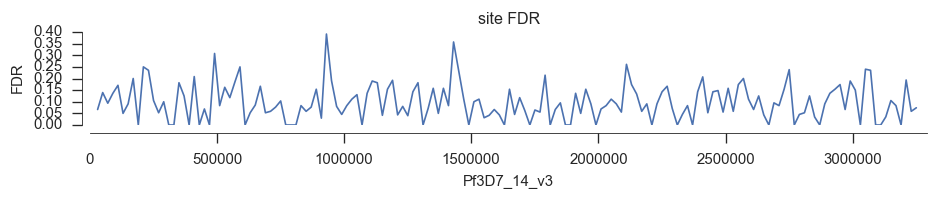

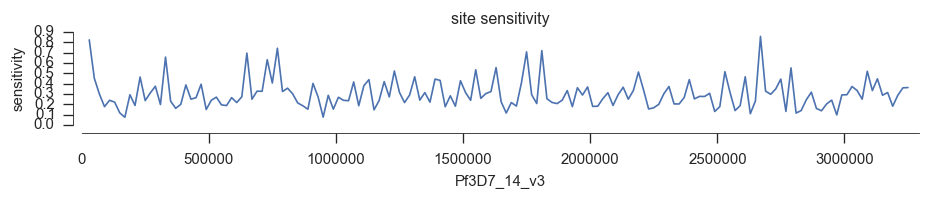

In [31]:
eval_performance(b'Pf3D7_14_v3', window=20000)